Please download the dataset from the below url

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
ls

drive/  sample_data/


In [24]:
cd drive/MyDrive/College/sem\ 7

/content/drive/MyDrive/College/sem 7


In [28]:
# import the libraries as shown below
#from keras.applications.vgg19 import VGG19
#from keras.applications.inception_v3 import InceptionV3
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'test'

In [30]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [31]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [32]:
# useful for getting number of output classes
folders = glob('train/*')

In [33]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [34]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [35]:

# view the structure of the model
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [36]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [37]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [38]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [39]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            shuffle=False,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [40]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-40-6ec5a35725ca>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
163/163 [==============================] - 780s 5s/step - loss: 0.2518 - accuracy: 0.9020 - val_loss: 0.3709 - val_accuracy: 0.8782
Epoch 2/5
163/163 [==============================] - 135s 828ms/step - loss: 0.1489 - accuracy: 0.9402 - val_loss: 0.5402 - val_accuracy: 0.8510
Epoch 3/5
163/163 [==============================] - 135s 829ms/step - loss: 0.1413 - accuracy: 0.9494 - val_loss: 0.4461 - val_accuracy: 0.8654
Epoch 4/5
163/163 [==============================] - 137s 843ms/step - loss: 0.1314 - accuracy: 0.9530 - val_loss: 0.4276 - val_accuracy: 0.8798
Epoch 5/5
163/163 [==============================] - 134s 825ms/step - loss: 0.0870 - accuracy: 0.9666 - val_loss: 0.2916 - val_accuracy: 0.9119


In [41]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(test_set, len(test_set))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = ['Pneumonia','Normal']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

<ipython-input-41-19b2a6e7ef7e>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_set, len(test_set))


Confusion Matrix
[[190  44]
 [ 11 379]]
Classification Report
              precision    recall  f1-score   support

   Pneumonia       0.95      0.81      0.87       234
      Normal       0.90      0.97      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.89      0.90       624
weighted avg       0.91      0.91      0.91       624



In [ ]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg19.h5')

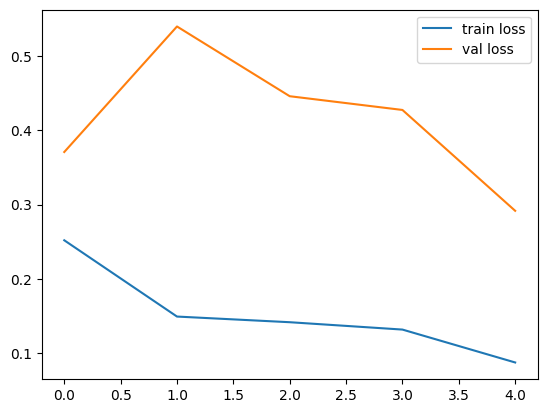

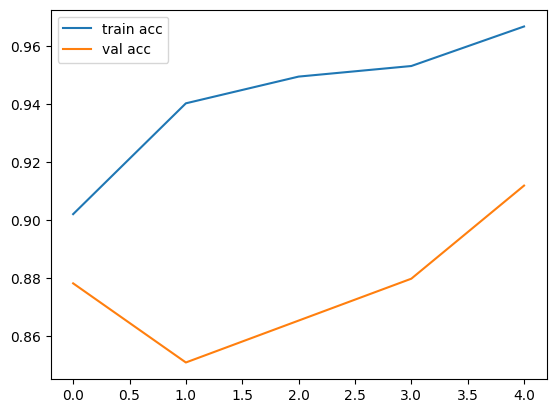

<Figure size 640x480 with 0 Axes>

In [43]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_19')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_19')